<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
<br />
Александр, доброго дня! рад приветствовать тебя в финале) <br />
Вот и он подобрался, поздравляю. Остался последний рывок в этом марафоне)<br>
<br />    
Несмотря на то, что проект не такой уж и простой как с позиции кода, так и в понимании процессов - <br />тебе удалось сдать его вовремя, это большой плюс для всех нас, спасибо:)<br />
<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.
    
    
<div class="alert alert-block alert-info">
Привет, Николай :) Снова встретились :) Спасибо за проверку и оставление ценных комментариев!
</div> 

### Цель:

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали. Целевым признаком является последнее измеренное значение температуры.

### Описание технологического процесса:

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Этапы:

Разработка прототипа модели машинного обучения состоит из следующих этапов:

- <b>Составление плана работы.</b> Исходное условие задачи заведомо неполное и содержит лишнюю информацию. Проведите исследовательский анализ данных, чтобы понять, какие вопросы подготовить.


- <b>Уточнение задачи.</b> Задайте вопросы тимлиду.


- <b>Разработка модели.</b> Отдайте код на проверку ревьюверу.


- <b>Подготовка отчёта.</b> Отправьте отчёт тимлиду, чтобы он проверил успешность выполнения задания.

На текущем этапе будет проведено знакомство с исходными данными, их исследовательский анализ, составлен план работы и подготовлены уточняющие вопросы.

# 1. Загрузка и подготовка данных

Импортируем библиотеку pandas для открытия датасетов в формате .csv и выводим общую информацию о них. Данные находятся в семи файлах.

Также импортируем модуль matplotlib.pyplot и библиотеку seaborn для отображения графиков. Для разбиения данных на обучающую и тестовую выборки импортируем функцию train_test_split. Для создания моделей градиентного бустинга из библиотеки lightgbm импортируем модуль LGBMRegressor, также импортируем модель линейной регрессии. Для выбора лучшей модели используем функцию кросс-валидации cross_val_score. Для определения MAE на тестовой выборке воспользуемся функцией mean_absolute_error. Библиотека numpy потребуется при определении значимости признаков.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import numpy as np

In [71]:
data_arc = pd.read_csv("M:/final_steel/data_arc.csv")
data_bulk = pd.read_csv("M:/final_steel/data_bulk.csv")
data_bulk_time = pd.read_csv("M:/final_steel/data_bulk_time.csv")
data_gas = pd.read_csv("M:/final_steel/data_gas.csv")
data_temp = pd.read_csv("M:/final_steel/data_temp.csv")
data_wire = pd.read_csv("M:/final_steel/data_wire.csv")
data_wire_time = pd.read_csv("M:/final_steel/data_wire_time.csv")


data_arc.name = 'data_arc'
data_bulk.name = 'data_bulk'
data_bulk_time.name = 'data_bulk_time'
data_gas.name = 'data_gas'
data_temp.name = 'data_temp'
data_wire.name = 'data_wire'
data_wire_time.name = 'data_wire_time'

datasets ={'data_arc':data_arc,
           'data_bulk':data_bulk,
           'data_bulk_time':data_bulk_time,
           'data_gas':data_gas,
           'data_temp':data_temp,
           'data_wire':data_wire,
           'data_wire_time':data_wire_time
          }

def general_information (dataset):
    
    total_na = dataset.isna().sum().sort_values(ascending = False)
    percent_of_na = (dataset.isna().sum() * 100 / dataset.isna().count()).sort_values(ascending=False)
    missing_dataset = pd.concat([total_na, percent_of_na], axis = 1, keys = ['Кол-во пропусков', '% пропусков'])
    for index in missing_dataset.index:
        missing_dataset.loc[index, 'Кол-во уникальных значений'] = dataset[index].value_counts().count()
    missing_dataset['Кол-во уникальных значений'] = missing_dataset['Кол-во уникальных значений'].astype('int64')
    missing_dataset['Тип данных'] = dataset[missing_dataset.index].dtypes
    missing_dataset.index.name = 'Признак'

    print('\033[92m', '\033[7m', '\033[4m', 'Датасет {} состоит из {} объектов и {} признаков'.
        format(dataset.name, len(dataset), len(dataset.columns)), '\033[0m', end='\n\n')
    
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(missing_dataset.to_string(), end='\n\n')
    
    print('\033[92m', '\033[7m', '\033[4m', 'Первые строки датасета {}'.format(dataset.name), 
          '\033[0m','\n\n', dataset.head(), end='\n\n')


for k, v in datasets.items():
    general_information(v)

   Датасет data_arc состоит из 14876 объектов и 5 признаков 



                      Кол-во пропусков  % пропусков  Кол-во уникальных значений Тип данных

Признак                                                                                   

Реактивная мощность                  0          0.0                       14866    float64

Активная мощность                    0          0.0                       14869    float64

Конец нагрева дугой                  0          0.0                       14876     object

Начало нагрева дугой                 0          0.0                       14875     object

key                                  0          0.0                        3214      int64



   Первые строки датасета data_arc  



    key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \

0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.976059   

1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.805607   

2    1  2019-05-03 11:11:44  2019

Во всех датасетах в столбце "key" указаны номера партий стали. Разные наблюдения с одинаковыми номерами соответствуют разным действиям с одной партией.

В датасете с информацией об электродах 14876 объектов и 5 признаков, пропусков нет.

В датасетах с объёмами и временем подачи сыпучих материалов 3129 объектов и 16 признаков в каждом, пропуски отсутствуют только в номерах партий. Очевидно, что большая часть сыпучих материалов редко используется для легирования стали, и использование данных датасетов для обучения моделей скорее всего нецелесообразно.

В датасете с информацией о продувке сплава газом 3239 объектов и 2 признака, пропусков нет. При этом на 110 номеров партий больше, чем в предыдущих двух датасетах, и нет временных интервалов.

В датасете с результатами измерения температуры 15907 объектов и 3 признака, пропуски присутствуют в значениях температуры.

В датасетах с объёмами и временем подачи проволочных материалов 3081 объект и 10 признаков в каждом, пропуски отсутствуют только в номерах партий. Очевидно, что большая часть проволочных материалов также редко используется для легирования стали, как и некоторые из сыпучих, и использование данных датасетов для обучения моделей скорее всего нецелесообразно.

Во всех датасетах количество уникальных значений в столбце "key" различно (от 3081 до 3239).

Во всех датасетах тип временных признаков строковый, его нужно заменить на временной.

Сперва проверим наличие дубликатов в каждом датасете.

In [72]:
print('Количество дубликатов в рассматриваемых датасетах {}, {}, {}, {}, {}, {} и {} соответственно.'.format(
    data_arc.duplicated().sum(), data_bulk.duplicated().sum(), data_bulk_time.duplicated().sum(),\
    data_gas.duplicated().sum(), data_temp.duplicated().sum(), data_wire.duplicated().sum(), data_wire_time.duplicated().sum()
)
     )

Количество дубликатов в рассматриваемых датасетах 0, 0, 0, 0, 0, 0 и 0 соответственно.


Приведем тип данных во временных признаках к временному типу.

In [73]:
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S') 
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')

for i in range(1,16):
    data_bulk_time['Bulk {}'.format(i)] = pd.to_datetime(data_bulk_time['Bulk {}'.format(i)], format='%Y-%m-%d %H:%M:%S')

data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера'], format='%Y-%m-%d %H:%M:%S')

for i in range(1,10):
    data_wire_time['Wire {}'.format(i)] = pd.to_datetime(data_wire_time['Wire {}'.format(i)], format='%Y-%m-%d %H:%M:%S')

Заполним нулями пропуски в датасетах с информацией о подаче супычих и проволочных материалов.

In [74]:
data_bulk.fillna(value=0, inplace=True)
data_bulk_time.fillna(value=0, inplace=True)
data_wire.fillna(value=0, inplace=True)
data_wire_time.fillna(value=0, inplace=True)

Удалим пропуски в целевом признаке. Помимо этого удалим целиком партии, в которых есть пропуски в последней температуре и наблюдения с одним замером в партии.

In [75]:
keys_with_na = data_temp[data_temp['Температура'].isna()].key.unique()

for key in keys_with_na:
    if np.isnan(data_temp.loc[data_temp[data_temp['key'] == key].index.max(), 'Температура']):
        data_temp.drop(data_temp[data_temp['key'] == key].index, inplace = True)
        
data_temp.dropna(subset=['Температура'], inplace = True)

data_temp_grouped = data_temp.groupby('key').agg({'Температура':['count'], 'Время замера':['max', 'min']})
data_temp.index = data_temp['key']
data_temp.drop(data_temp_grouped[data_temp_grouped['Температура', 'count'] == 1].index, inplace=True)

In [ ]:
data_temp

,key,Время замера,Температура
key,,,
1,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
1,1,2019-05-03 11:29:11,1618.0
1,1,2019-05-03 11:30:01,1601.0
1,1,2019-05-03 11:30:39,1613.0
...,...,...,...
2498,2498,2019-08-06 02:19:26,1593.0
2498,2498,2019-08-06 02:25:31,1594.0
2499,2499,2019-08-06 02:40:25,1569.0


Теперь проверим наличие корреляции между активной и реактивной мощностями в данных об электродах.

In [77]:
print('Значение корреляции Пирсона между активной и реактивной мощностями составляет {:.5f}'.format(
    data_arc['Активная мощность'].corr(data_arc['Реактивная мощность'], method='pearson')), end='\n\n')

print('Значение корреляции Спирмена между активной и реактивной мощностями составляет {:.5f}'.format(
    data_arc['Активная мощность'].corr(data_arc['Реактивная мощность'], method='spearman')))

Значение корреляции Пирсона между активной и реактивной мощностями составляет 0.05444



Значение корреляции Спирмена между активной и реактивной мощностями составляет 0.96937


Как и предполагалось, между активной и реактивной мощностями имеется сильная корреляция для данных с распределением, отличающимся от нормального. Значения реактивной мощности можно удалить.

In [78]:
data_arc.drop(columns=['Реактивная мощность'], inplace=True)

### Вывод

В датасете с информацией об электродах 14876 объектов и 5 признаков, пропусков нет.

В датасетах с объёмами и временем подачи сыпучих материалов 3129 объектов и 16 признаков в каждом, пропуски отсутствуют только в номерах партий. Очевидно, что большая часть сыпучих материалов редко используется для легирования стали, и использование данных датасетов для обучения моделей скорее всего нецелесообразно. Пропуски в данных датасетах заполнены нулями.

В датасете с информацией о продувке сплава газом 3239 объектов и 2 признака, пропусков нет. При этом на 110 номеров партий больше, чем в предыдущих двух датасетах, и нет временных интервалов.

В датасете с результатами измерения температуры 15907 объектов и 3 признака, пропуски присутствуют в значениях температуры.

В датасетах с объёмами и временем подачи проволочных материалов 3081 объект и 10 признаков в каждом, пропуски отсутствуют только в номерах партий. Очевидно, что большая часть проволочных материалов также редко используется для легирования стали, как и некоторые из сыпучих, и использование данных датасетов для обучения моделей скорее всего нецелесообразно.

Во всех датасетах количество уникальных значений в столбце "key" различно (от 3081 до 3239).

Во всех датасетах тип временных признаков изменен со строкового на временной.

Дубликаты в датасетах отсутствуют.

Из датасета с данными об электродах удалены значения реактивной мощности по причине сильной корреляции с активной мощностью.

Из датасета с данными о температурах стали удалены пропущенные значения, партии целиком с пропусками в последней температуре и наблюдения с одним замером в партии.

# 2. Исследовательский анализ данных

Проведем исследовательский анализ имеющихся данных. Для начала построим диаграммы размаха для выявления выбросов и аномалий.

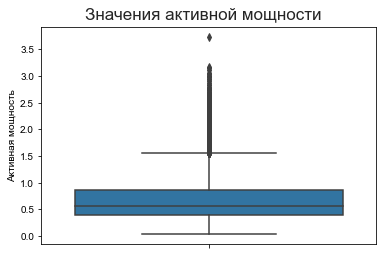

In [79]:
sb.boxplot(y=data_arc['Активная мощность'])
sb.set(rc={'figure.figsize':(20, 7)})
plt.suptitle('Значения активной мощности', fontsize=17, y=0.95)
plt.show()

В значениях активной мощности есть выбросы (значения более 3.5), которые можно удалить.

In [80]:
data_arc.drop(index=data_arc[(data_arc['Активная мощность'] > 3.5)].index, inplace=True)

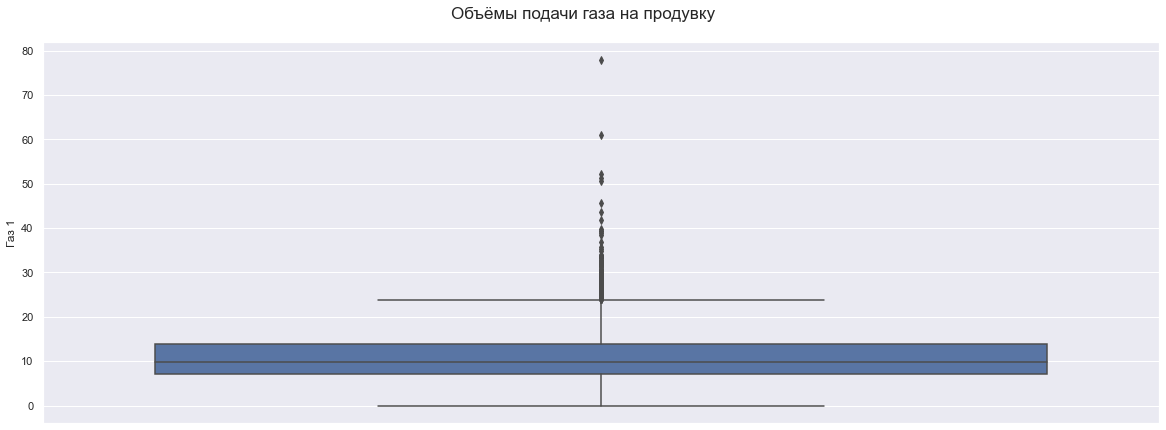

In [81]:
sb.boxplot(y=data_gas['Газ 1'])
sb.set(rc={'figure.figsize':(20, 7)})
plt.suptitle('Объёмы подачи газа на продувку', fontsize=17, y=0.95)
plt.show()

В значениях объёмов подачи газа на продувку есть выбросы (значения более 50), которые можно удалить.

In [82]:
data_gas.drop(index=data_gas[(data_gas['Газ 1'] > 50)].index, inplace=True)

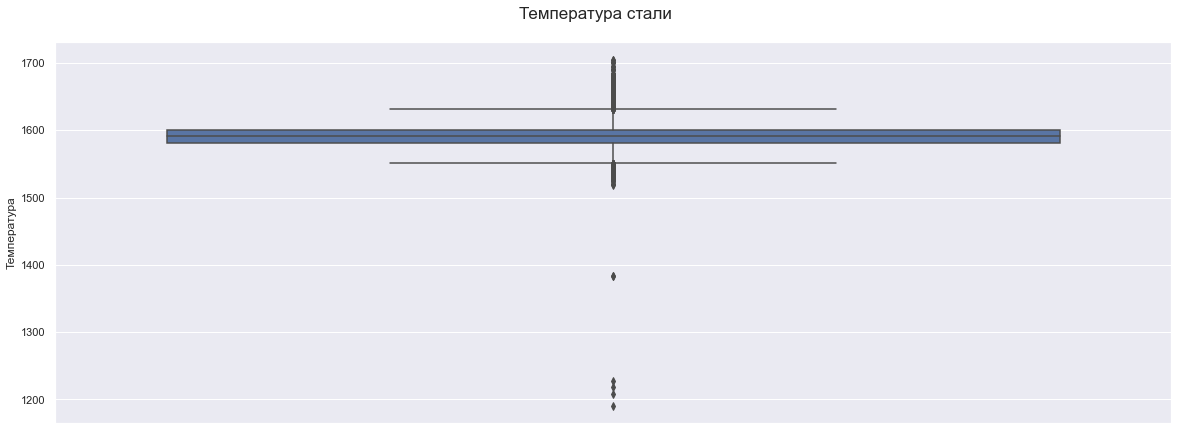

In [83]:
sb.boxplot(y=data_temp['Температура'])
sb.set(rc={'figure.figsize':(20, 7)})
plt.suptitle('Температура стали', fontsize=17, y=0.95)
plt.show()

В значениях температур стали есть выбросы (значения менее 1400), которые можно удалить.

In [84]:
data_temp.drop(index=data_temp[(data_temp['Температура'] < 1400)].index, inplace=True)

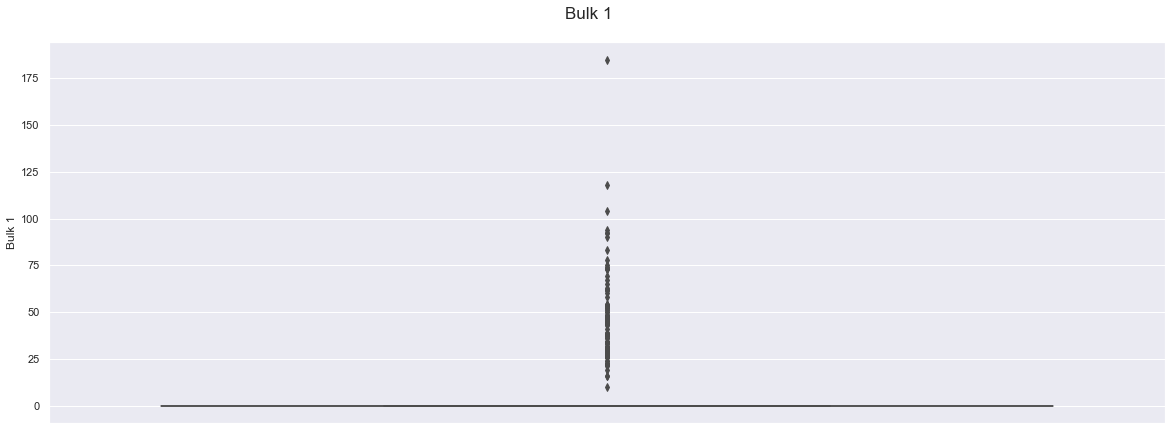

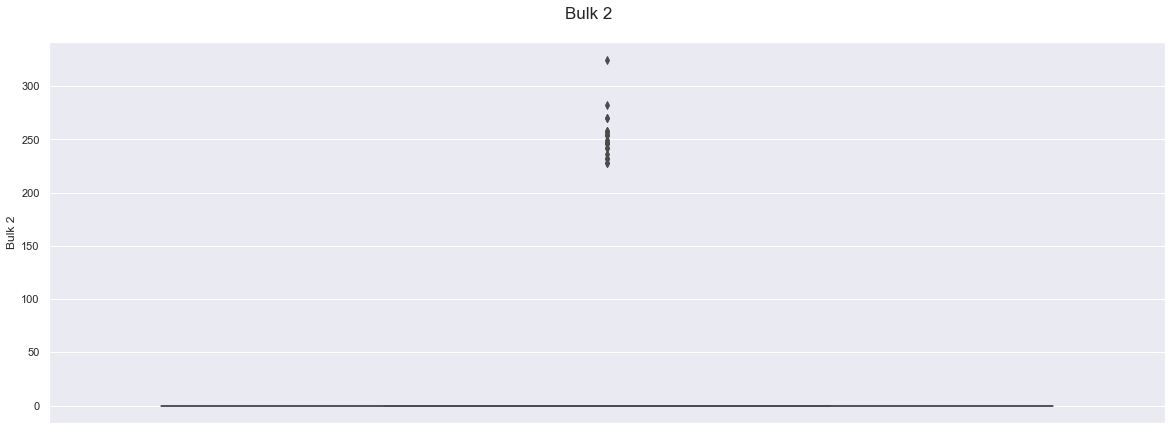

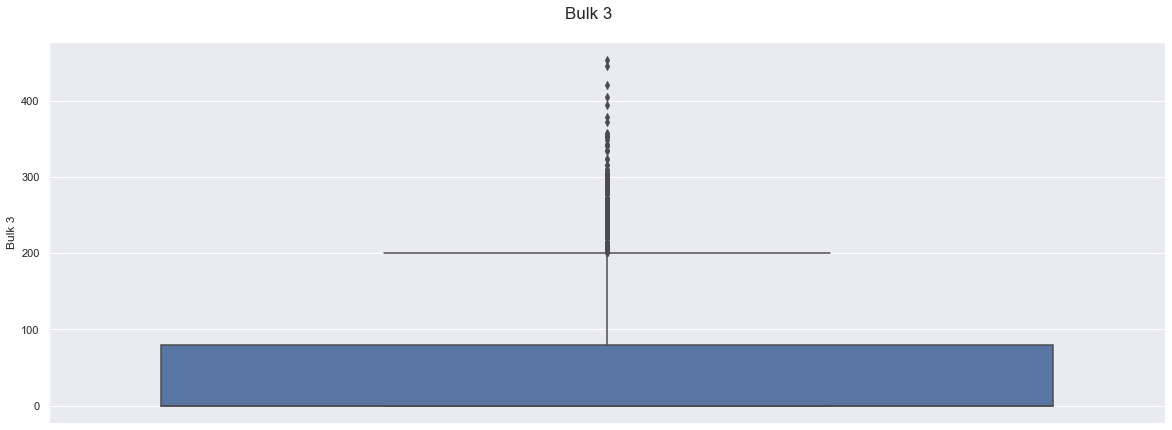

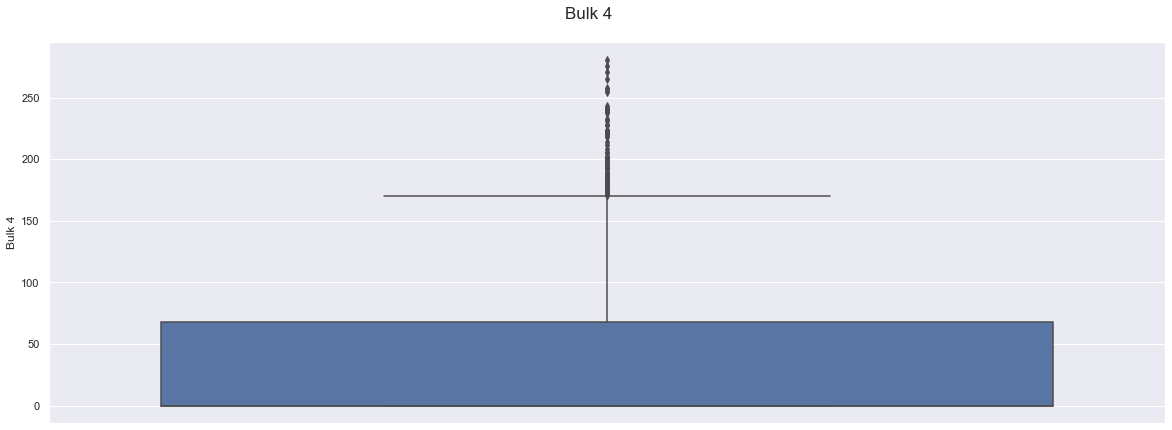

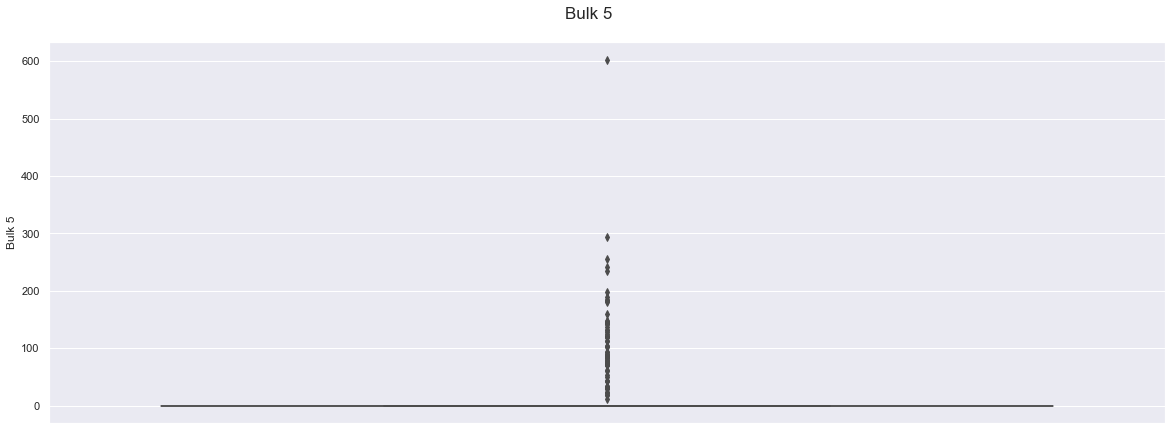

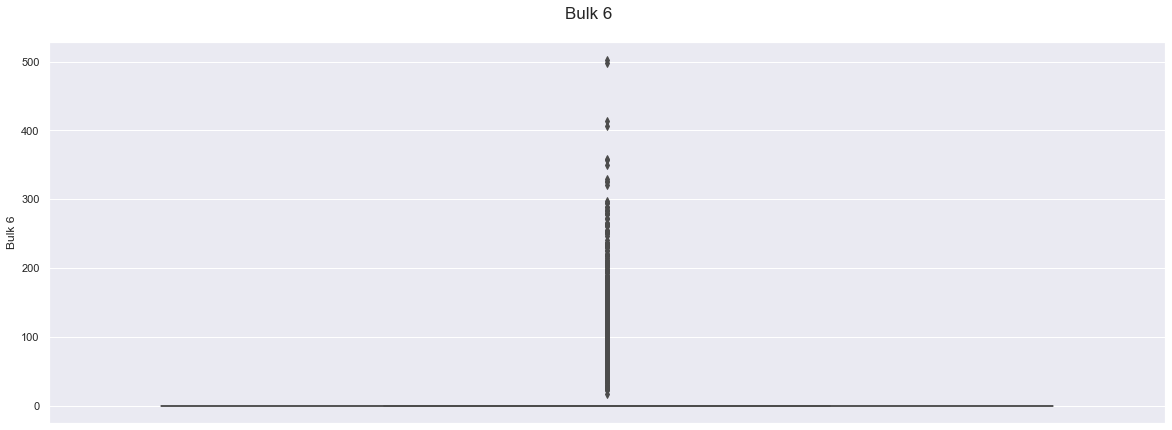

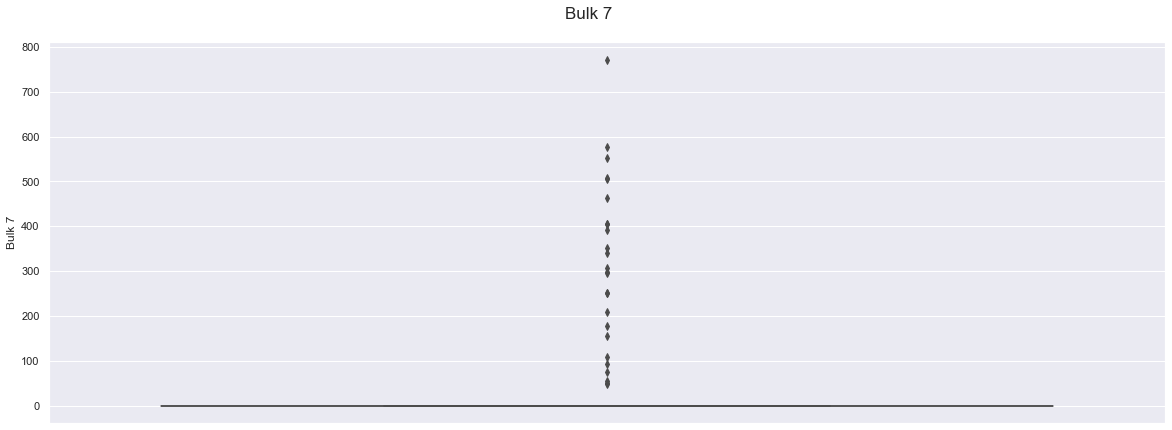

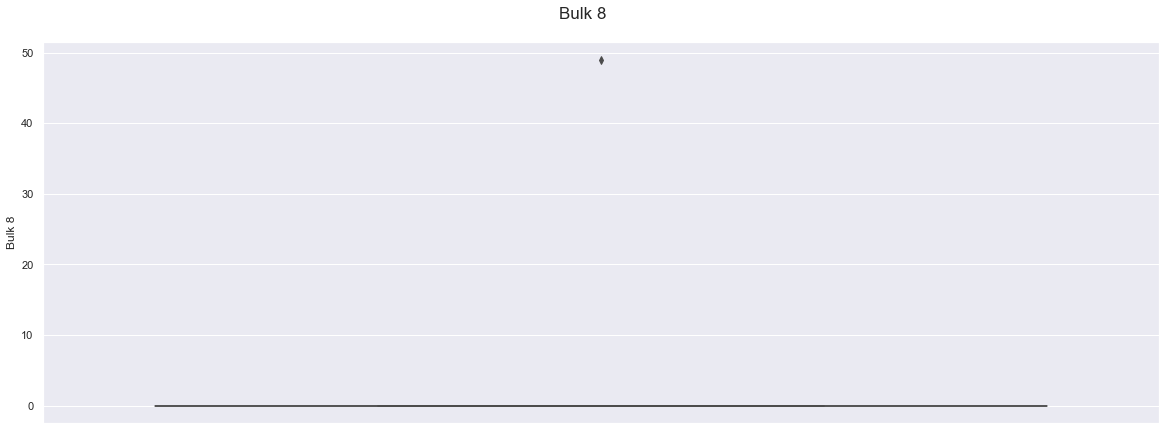

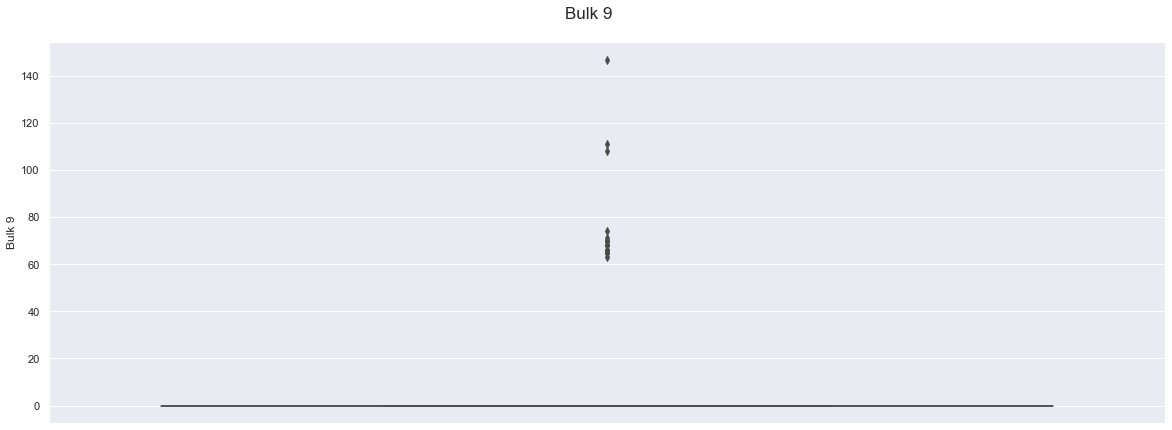

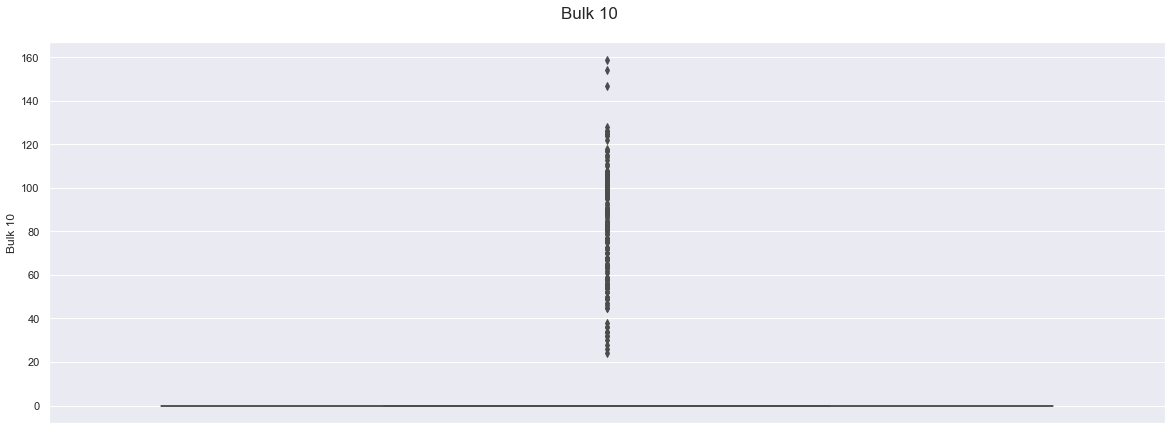

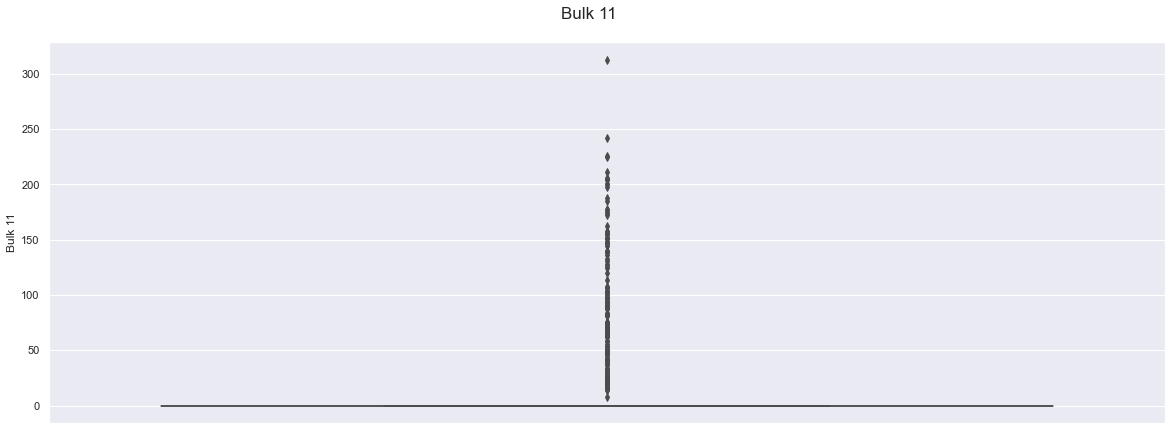

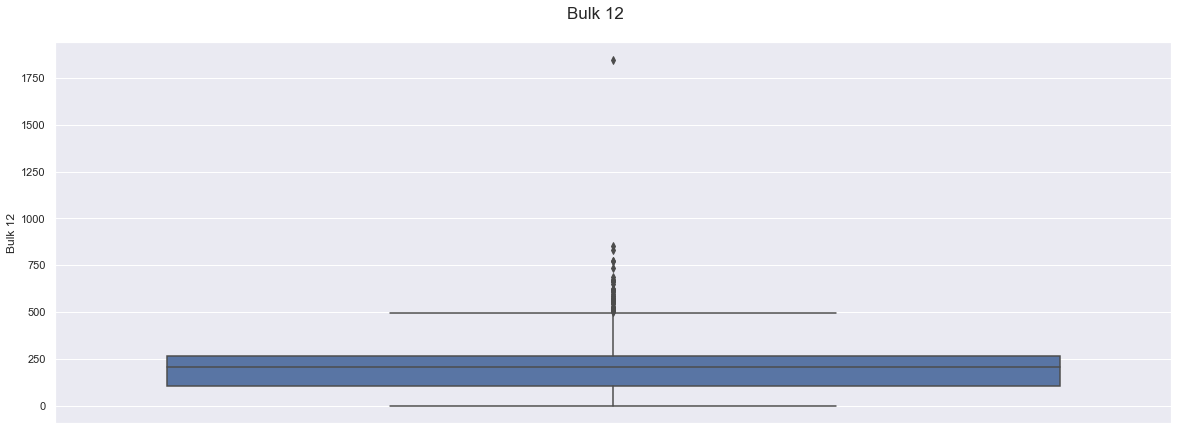

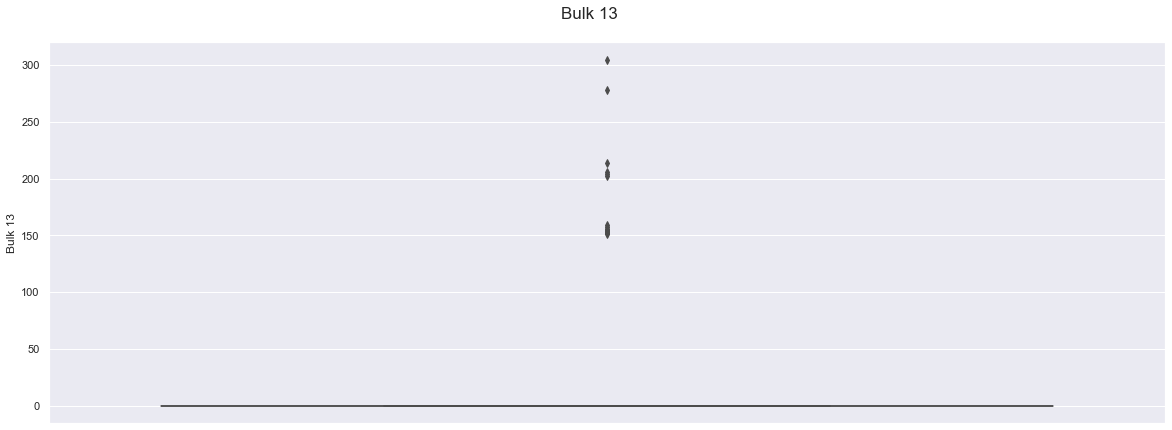

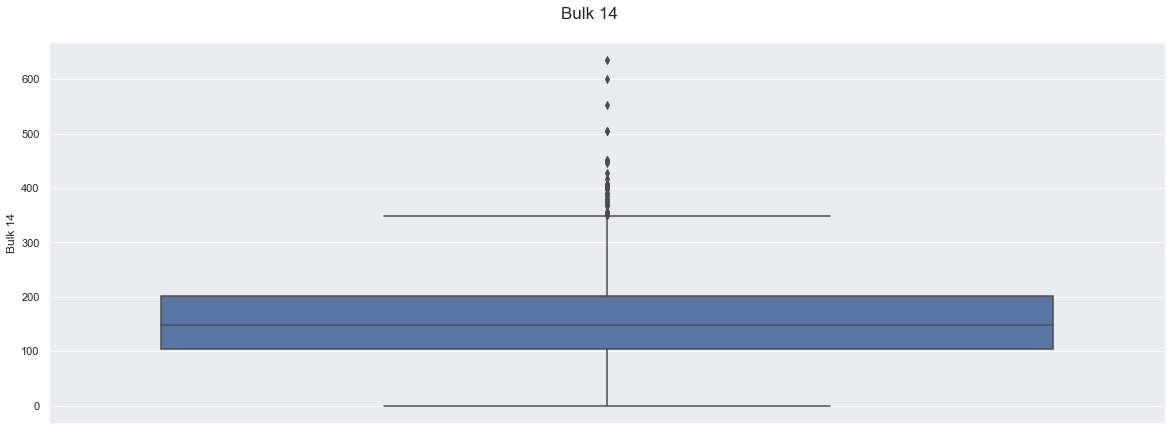

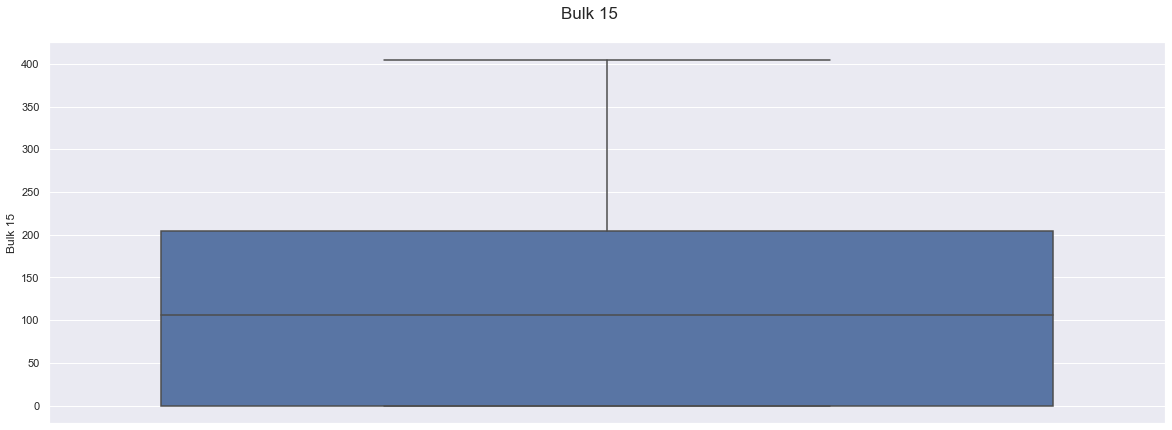

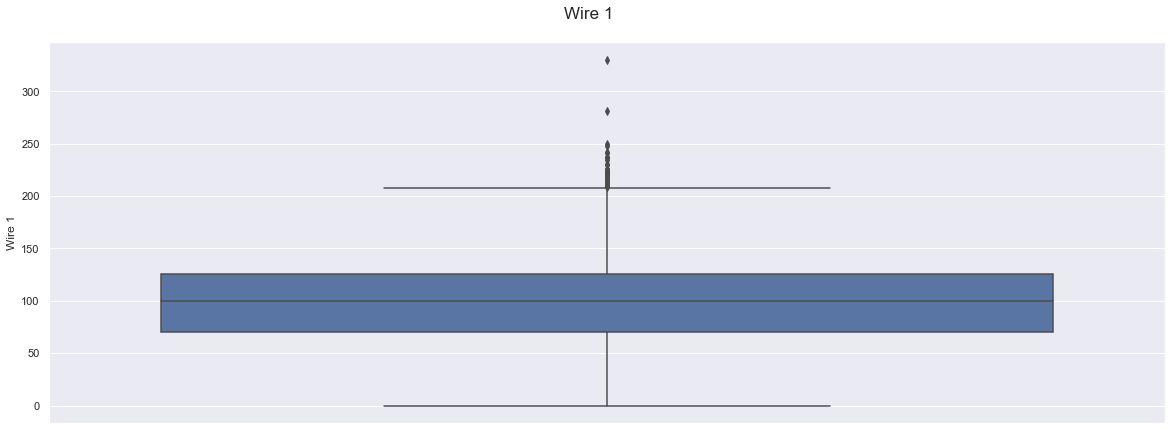

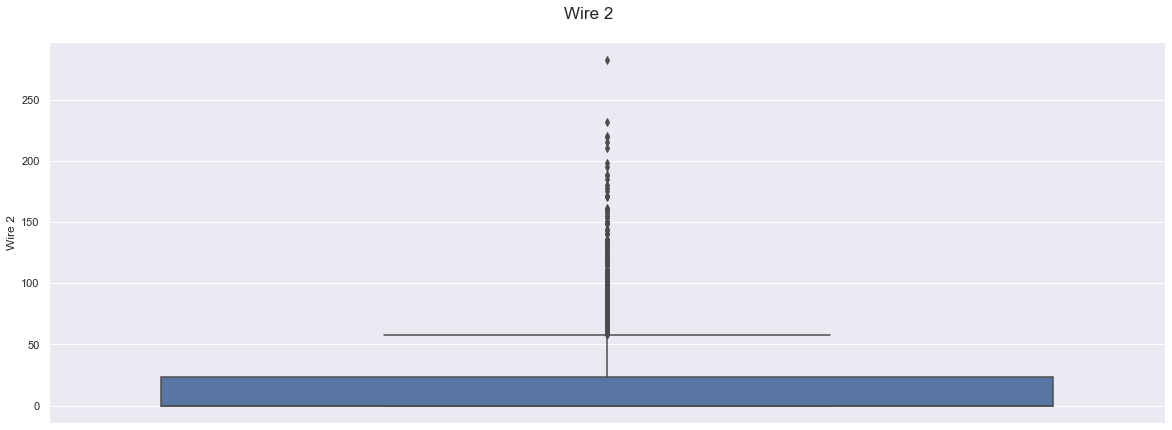

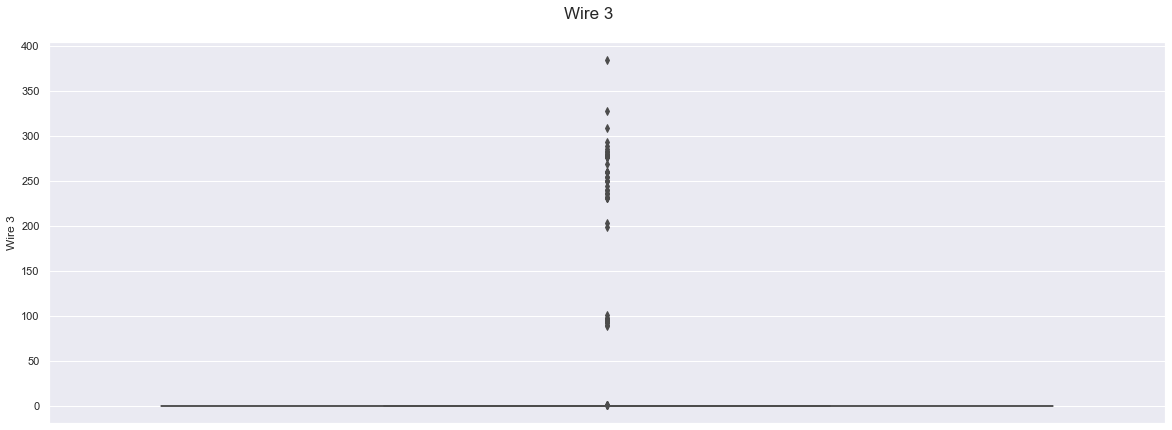

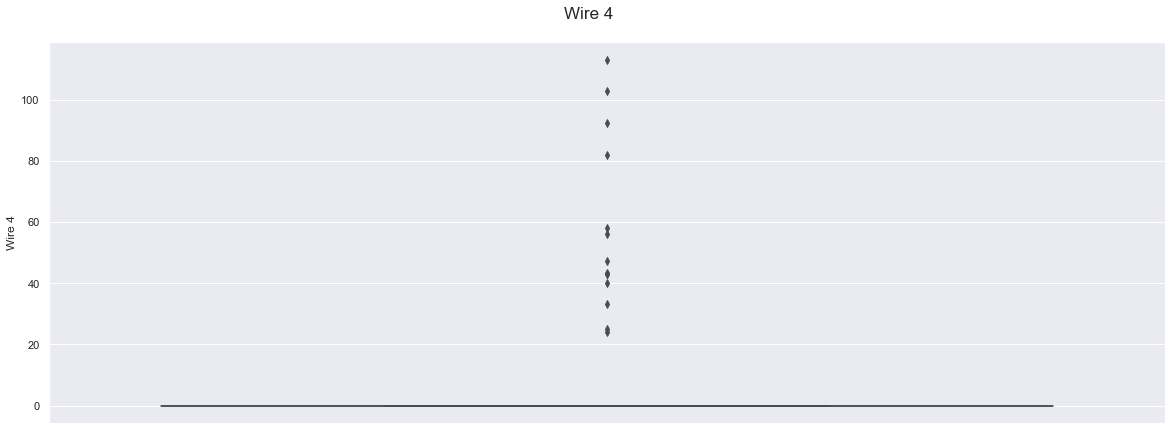

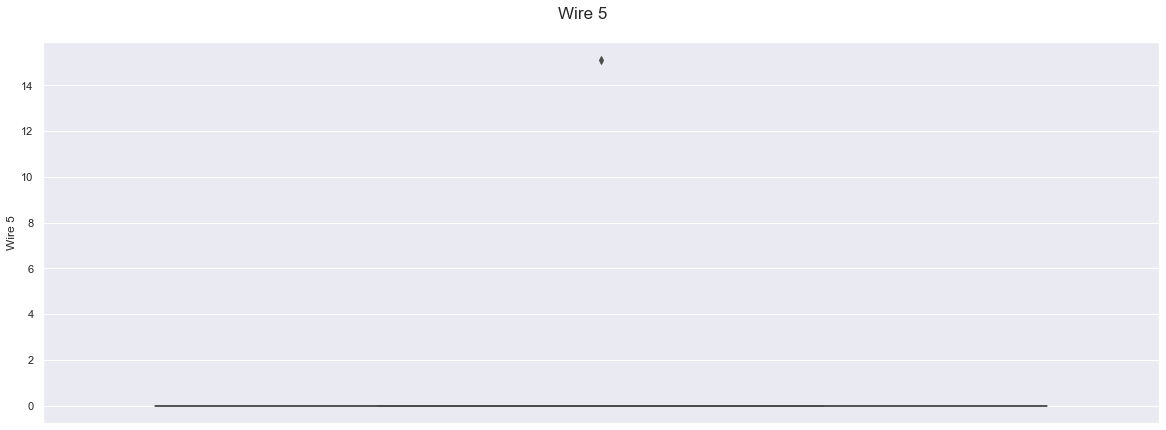

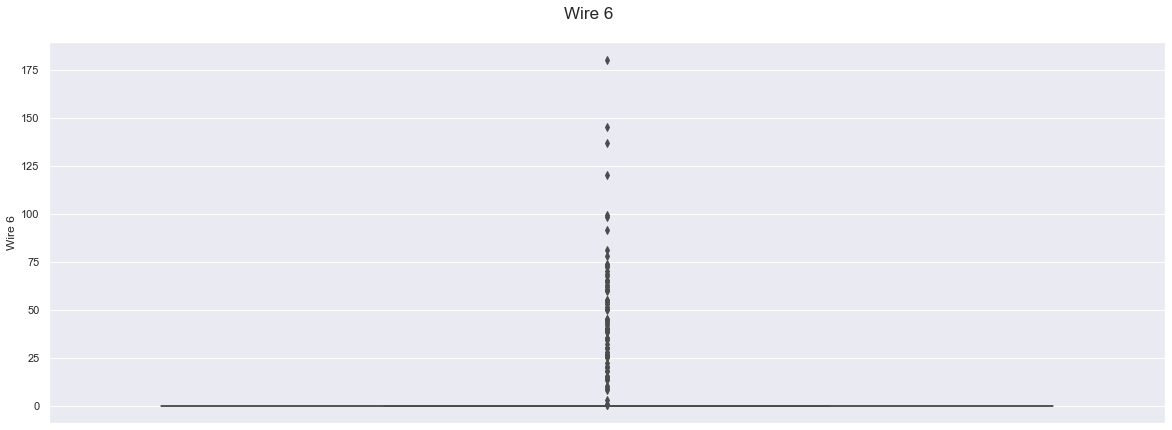

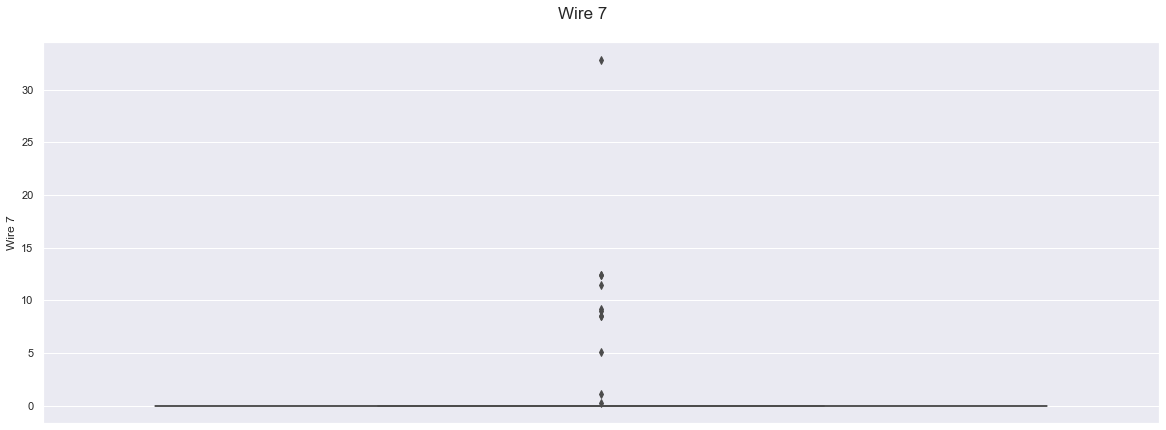

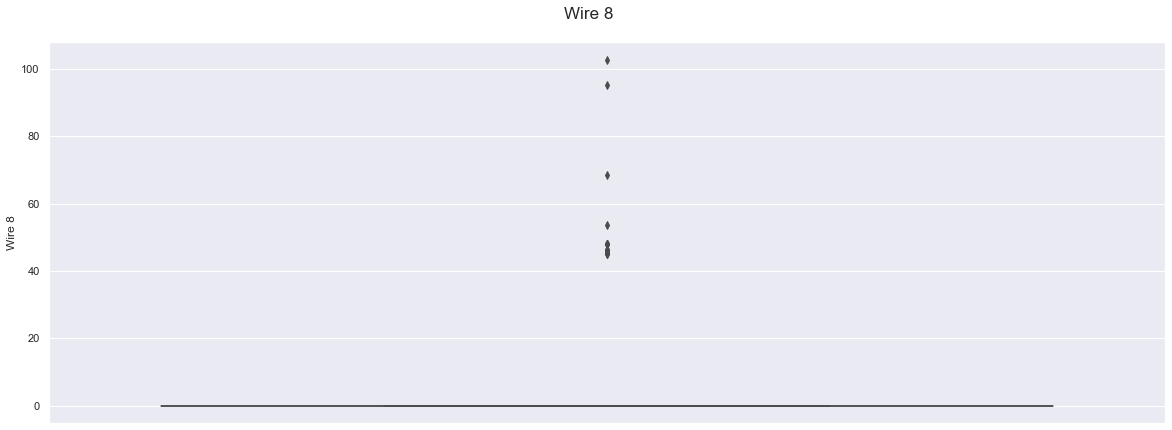

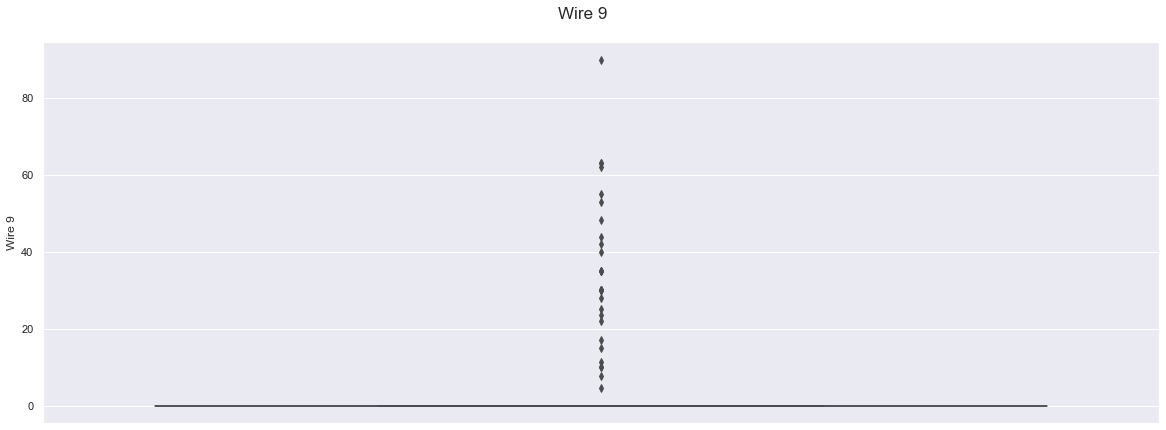

In [85]:
for column in data_bulk.drop(columns='key').columns:
    sb.boxplot(y=data_bulk[column])
    sb.set(rc={'figure.figsize':(20, 7)})
    plt.suptitle(column, fontsize=17, y=0.95)
    plt.show()
    
for column in data_wire.drop(columns='key').columns:
    sb.boxplot(y=data_wire[column])
    sb.set(rc={'figure.figsize':(20, 7)})
    plt.suptitle(column, fontsize=17, y=0.95)
    plt.show()

В зависимости от количества подач сыпучих и проволочных материалов для легирования стали в ряде из них значения, отличающиеся от нуля можно назвать выбросами. При этом удалить их нельзя, т.к. неизвестно, какой состав исходной стали и какой состав должен быть у легированной стали.

Посмотрим на распределение активной мощности и температуры стали по времени.

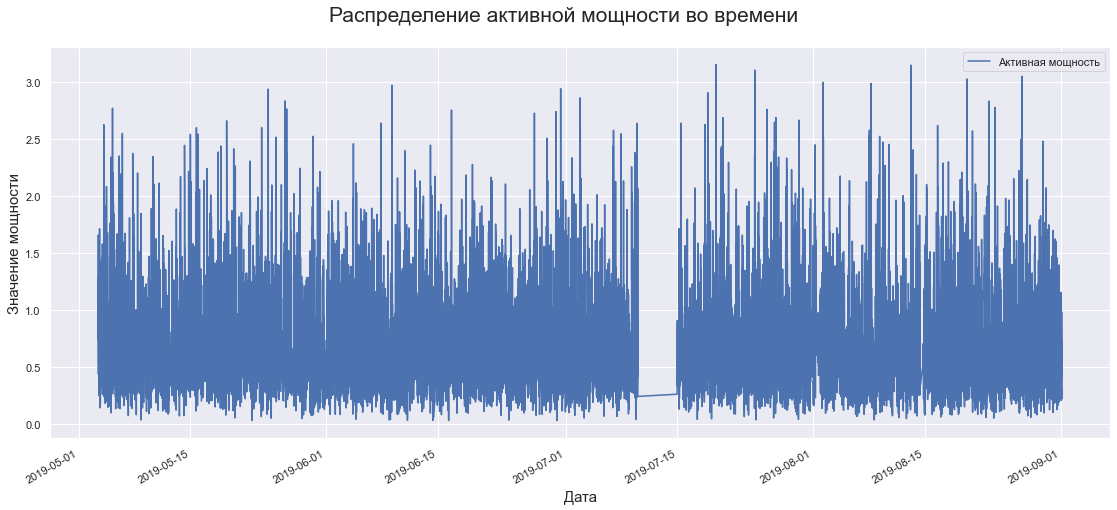

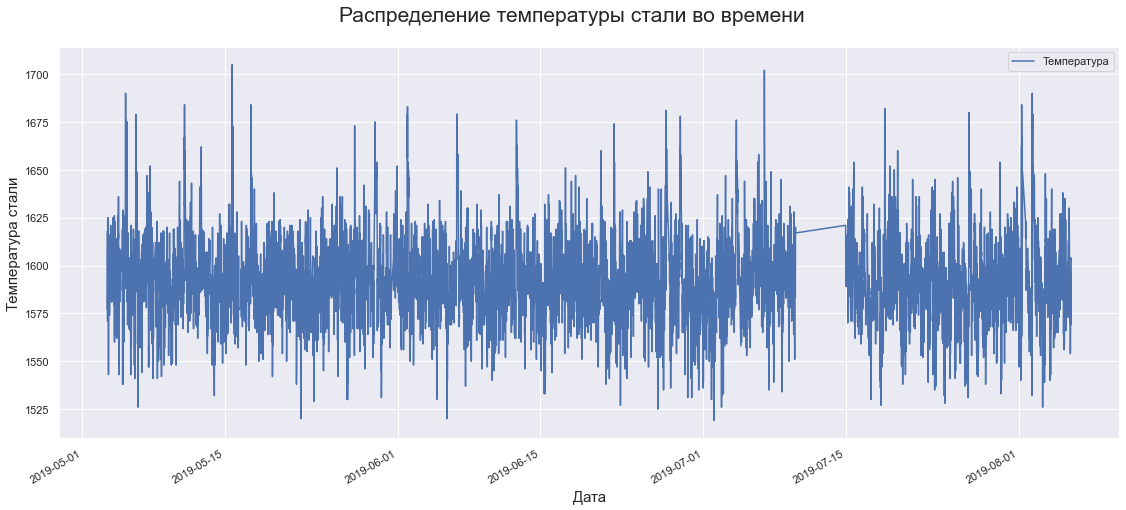

In [86]:
data_arc.index = data_arc['Начало нагрева дугой']
data_temp.index = data_temp['Время замера']

data_arc.drop(columns=['key', 'Начало нагрева дугой', 'Конец нагрева дугой']).plot(figsize=(19, 8))
plt.suptitle('Распределение активной мощности во времени', fontsize=21, y=0.95)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Значение мощности', fontsize=15)

data_temp.drop(columns=['key', 'Время замера']).plot(figsize=(19, 8))
plt.suptitle('Распределение температуры стали во времени', fontsize=21, y=0.95)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Температура стали', fontsize=15)

plt.show()

На обоих графиках имеется характерный участок с линейным возрастанием. Это может быть связано с отсутствием легирования стали в данный промежуток времени.

<b>План работы:</b>

 - объединить все данные в один датасет по каждой партии (одна строка - одна партия) с параметрами перед легированием и после него;
 
 - разбить общий датасет на обучающую и тестовую выборки;
 
 - обучить регрессионные модели с последующей проверкой качества (кросс-валидация) и выбором лучшей;
 
 - проверить значимость каждого признака для предсказания и убрать лишние из использования (при необходимости).

# 3. Построение и обучение моделей

Объединим все датасеты в один по оставшимся в data_temp номерам партий. Начальной будет первая температура в партии, конечной - последняя. Активная мощность будет суммой значений, идущих по времени после начальной и перед конечной температурами. 

In [87]:
data_temp.reset_index(drop=True, inplace=True)
data_arc.reset_index(drop=True, inplace=True)
data_full = pd.DataFrame()

for key in data_temp.key.unique():
    
    # данные по температуре и времени замера
    data_full.loc[key, 'first_temp'] = data_temp.loc[data_temp[data_temp['key'] == key].index.min(), 'Температура']
    data_full.loc[key, 'first_temp_time'] = data_temp.loc[data_temp[data_temp['key'] == key].index.min(), 'Время замера']
    data_full.loc[key, 'last_temp'] = data_temp.loc[data_temp[data_temp['key'] == key].index.max(), 'Температура']
    data_full.loc[key, 'last_temp_time'] = data_temp.loc[data_temp[data_temp['key'] == key].index.max(), 'Время замера']
    
    # данные по акт. мощности
    data_full.loc[key, 'active_power'] = data_arc[(data_arc['key'] == key) & (
        data_arc['Начало нагрева дугой'] > data_full.loc[key, 'first_temp_time']) & (
    data_arc['Конец нагрева дугой'] < data_full.loc[key, 'last_temp_time'])]['Активная мощность'].sum()
    
    # данные по объемам газа
    try:
        data_full.loc[key, 'gas_volume'] = data_gas[(data_gas['key'] == key)]['Газ 1'].array[0]
    except IndexError:
        pass
            
    # данные по сыпучим и проволочным материалам
    for column in data_bulk_time.columns[1:]:
        try:
            if data_bulk_time[data_bulk_time['key'] == key][column].array[0] == 0 or \
                data_bulk_time[data_bulk_time['key'] == key][column].array[0] < data_full.loc[key, 'first_temp_time']:
                data_full.loc[key, column] = 0
            
            else:
                data_full.loc[key, column] = data_bulk[data_bulk['key'] == key][column].array[0]   
        except IndexError:
            pass
        
    for column in data_wire_time.columns[1:]:
        try:
            if data_wire_time[data_wire_time['key'] == key][column].array[0] == 0 or \
                data_wire_time[data_wire_time['key'] == key][column].array[0] < data_full.loc[key, 'first_temp_time']:
                data_full.loc[key, column] = 0
            
            else:
                data_full.loc[key, column] = data_wire[data_wire['key'] == key][column].array[0]   
        except IndexError:
            pass

Удалим из общего датасета данные по времени замера температуры.

In [88]:
data_full.drop(columns=['first_temp_time', 'last_temp_time'], inplace=True)

In [89]:
data_full

,first_temp,last_temp,active_power,gas_volume,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,...,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
1,1571.0,1613.0,2.352117,29.749986,0.0,0.0,0.0,43.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1581.0,1602.0,2.614535,12.555561,0.0,0.0,0.0,73.0,0.0,0.0,...,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1596.0,1599.0,1.463829,28.554793,0.0,0.0,0.0,34.0,0.0,0.0,...,0.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1601.0,1625.0,1.220955,18.841219,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1576.0,1602.0,1.889121,5.413692,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1570.0,1591.0,2.335669,7.125735,0.0,0.0,21.0,0.0,0.0,0.0,...,0.0,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,1554.0,1591.0,3.809439,9.412616,0.0,0.0,0.0,63.0,0.0,0.0,...,226.0,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,1571.0,1589.0,1.631396,6.271699,0.0,0.0,0.0,85.0,0.0,0.0,...,0.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,1591.0,1594.0,2.245831,14.953657,0.0,0.0,90.0,0.0,0.0,0.0,...,0.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Удалим имеющиеся пропуски.

In [90]:
data_full.dropna(inplace=True)

Удалим номера партий из индекса.

In [91]:
data_full.reset_index(drop=True, inplace=True)

Для обучения моделей разобьем датасет на обучающую и тестовую выборки.

In [92]:
features_train, features_test, target_train, target_test = train_test_split(
    data_full.drop('last_temp', axis=1), data_full['last_temp'], test_size=0.2, random_state=12345)

Приступим к обучению моделей и выбору лучшей из них. В работе будут использованы модели градиентного бустинга из библиотеки "LightGBM", а также модель линейной регрессии.

Oбучение моделей градиентного бустинга будет проводиться с изменением "max_depth" (макс. глубина деревьев, по умолчанию неограничена), "learning_rate" (скорость обучения, по умолчанию 0.1) и "n_estimators" (кол-во деревьев в модели, по умолчанию 100).

In [93]:
models_count = len(range(2,11,2)) * len(range(1,13,2)) * len(range(5,51,5))
models_name = []

for count in range(1, models_count + 1, 1):
    models_name.append('model_' + str(count))

models_lightgbm = {}
scoring = {}

i = 0
for max_depth in range(2,11,2):
    for learning_rate in range(1,13,2):
        for n_estimators in range(5,51,5):
            models_lightgbm[models_name[i]] = LGBMRegressor(
                reg_alpha = 0.6, num_leaves = 20, max_depth = max_depth, learning_rate = learning_rate/10, n_estimators = n_estimators)
            
            scoring[models_name[i]] = abs(cross_val_score(
                models_lightgbm[models_name[i]], features_train, target_train, cv=5, scoring='neg_mean_absolute_error'))

            i += 1

model_lin_reg = LinearRegression()
scoring['model_lin_reg'] = abs(cross_val_score(
    model_lin_reg, features_train, target_train, cv=5, scoring='neg_mean_absolute_error'))

data_scoring = pd.DataFrame.from_dict(scoring, orient='index')

for index in data_scoring.index:
    data_scoring.loc[index, 'mean_mae'] = data_scoring.loc[index, :].mean()

Посмотрим, у какой модели получилось наименьшее среднее значение MAE после кросс-валидации.

In [94]:
data_scoring.sort_values(by='mean_mae', inplace=True)
data_scoring.head()

,0,1,2,3,4,mean_mae
model_190,6.100033,6.529254,5.929112,5.441755,5.696982,5.939427
model_189,6.112646,6.543272,5.938749,5.398672,5.704626,5.939593
model_188,6.122953,6.580690,5.947354,5.384046,5.713150,5.949639
model_250,6.078938,6.547267,5.968559,5.506991,5.652840,5.950919
model_128,6.085831,6.568654,5.935812,5.430088,5.754206,5.954918


Проверим гиперпараметры лучшей модели.

In [95]:
models_lightgbm['model_190']

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=8,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=50, n_jobs=-1, num_leaves=20, objective=None,
              random_state=None, reg_alpha=0.6, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Проверим качество модели на тестовой выборке.

In [96]:
models_lightgbm['model_190'].fit(features_train, target_train)

predictions = models_lightgbm['model_190'].predict(features_test)

print('Значение MAE лучшей модели на тестовой выборке составляет {:.2f}'.format(
    mean_absolute_error(predictions, target_test)))

Значение MAE лучшей модели на тестовой выборке составляет 6.24


Проверим значимость признаков, на которых обучалась модель, для определения ключевых из них.

   Важность признаков: 

Важность признака active_power составляет 197.00

Важность признака first_temp составляет 196.00

Важность признака Wire 1 составляет 92.00

Важность признака gas_volume составляет 89.00

Важность признака Bulk 14 составляет 88.00

Важность признака Bulk 12 составляет 49.00

Важность признака Wire 2 составляет 45.00

Важность признака Bulk 3 составляет 38.00

Важность признака Bulk 6 составляет 38.00

Важность признака Bulk 15 составляет 30.00

Важность признака Bulk 1 составляет 28.00

Важность признака Bulk 4 составляет 17.00

Важность признака Bulk 11 составляет 15.00

Важность признака Bulk 5 составляет 7.00

Важность признака Wire 3 составляет 7.00

Важность признака Bulk 10 составляет 3.00

Важность признака Wire 6 составляет 2.00

Важность признака Wire 8 составляет 0.00

Важность признака Bulk 9 составляет 0.00

Важность признака Bulk 8 составляет 0.00

Важность признака Bulk 7 составляет 0.00

Важность признака Bulk 13 составляет 0.00

Важность признак

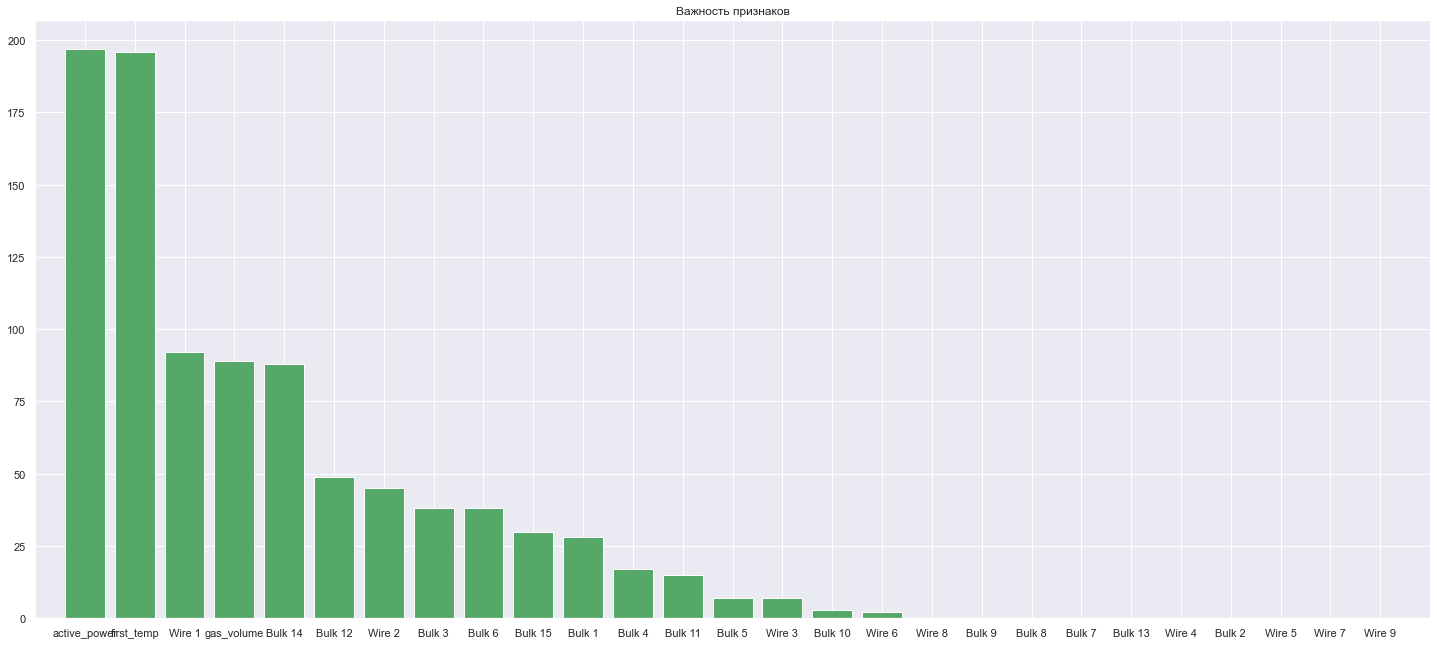

In [97]:
importances = models_lightgbm['model_190'].feature_importances_

indices = np.argsort(importances)[::-1]
print('\033[92m', '\033[7m', '\033[4m', 'Важность признаков:', '\033[0m')

for f in range(features_train.shape[1]):
    print("Важность признака {} составляет {:.2f}".format(
        features_train.columns.array[indices[f]], importances[indices[f]])
         )

plt.figure(figsize=(25,11))
plt.title('Важность признаков')
plt.bar(range(features_train.shape[1]), importances[indices],
        color="g", align="center")
plt.xticks(range(features_train.shape[1]), features_train.columns.array[indices])
plt.xlim([-1, features_train.shape[1]])
plt.show()

Наиболее значимыми для предсказания конечной температуры являются значения подаваемой на электроды мощности, начальной температуры, подача проволочного материала №1 и расход газа. Далее идут объёмы подаваемых для легирования стали материалов, часть из которых можно не использовать (большинство значений у них равно 0).

### Вывод

Датасет со значениями температуры проверен на количество замеров в одной партии, наблюдения с одним замером в партии удалены.

Все датасеты объединены в один по оставшимся в data_temp номерам партий. В качестве начальной температуры принята первая в партии, конечной - последняя. Активная мощность определена как сумма значений, идущих по времени после начальной и перед конечной температурами. 

Общий датасет разбит на обучающую и тестовую выборки в соотношении 3:1.

В работе использованы модели градиентного бустинга из библиотеки "LightGBM", а также модель линейной регрессии.

Oбучение моделей градиентного бустинга проводилось с изменением "max_depth" (макс. глубина деревьев, по умолчанию неограничена), "learning_rate" (скорость обучения, по умолчанию 0.1) и "n_estimators" (кол-во деревьев в модели, по умолчанию 100).

После кросс-валидации наименьшее среднее значение MAE получилось у модели градиентного бустинга с макс. глубиной деревьев равной 8, скоростью обучения 0.1 и 50 деревьями в модели.

Качество модели (MAE) на тестовой выборке составило 6.24.

Также проверена значимость признаков, на которых обучалась модель, для определения ключевых из них.

Наиболее значимыми для предсказания конечной температуры являются значения подаваемой на электроды мощности, начальной температуры, подача проволочного материала №1 и расход газа. Далее идут объёмы подаваемых для легирования стали материалов, часть из которых можно не использовать (большинство значений у них равно 0).